In [15]:
using MAB
using Statistics
using PyPlot
using Distributions
using StatsBase

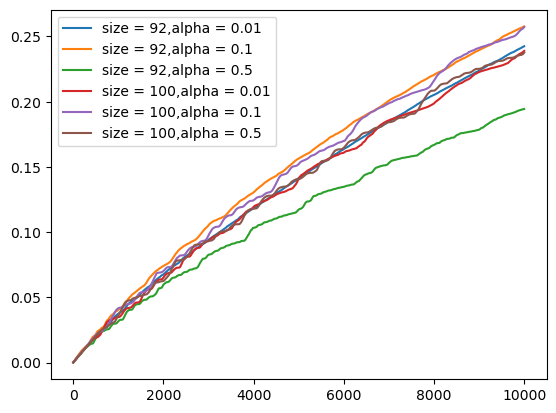

sys:1: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.


PyObject <matplotlib.legend.Legend object at 0x7fd0c254a790>

In [22]:
total_time = 10000
arms = []

rounds = 10
observations = zeros(total_time, rounds)
alphas = [0.01, 0.1, 0.5]
mean_rewards = collect(0.1:0.1:1.0)
candidate_sizes = [trunc(Int,log(total_time) / 0.1),isqrt(total_time),]
for candidate_size in candidate_sizes
    for alpha in alphas
        weights = FrequencyWeights([ones(9)* (1-alpha)/9; alpha])
        # mean_samples = sample(mean_rewards, weights, isqrt(total_time))
        # arms = []
        # for m in mean_samples
        #     push!(arms, Arms.Bernoulli(m))
        # end
        mean_samples = sample(mean_rewards, weights, candidate_size)
        for m in mean_samples
            push!(arms, Arms.Bernoulli(m))
        end
        # println(arms)
        algUCB = UCB1(length(arms))
        for round = 1:rounds
            Algorithms.reset!(algUCB)
            for t = 1:total_time
                reward = Arms.pull!(arms[get_arm_index(algUCB)])
                update_reward!(algUCB, reward)
                observations[t, round] = reward
            end
        end
        avg_reward = mean(observations, dims=2)
        # println(avg_reward)
        PyPlot.plot(1:total_time,   cumsum(1 .- avg_reward,dims=1)./total_time, label = "size = $candidate_size,alpha = $alpha")
    end
end
PyPlot.show()
PyPlot.legend()

In [17]:
sortperm(algUCB.count)

3330-element Vector{Int64}:
    1
    2
   19
   20
   21
   23
   31
   35
   36
   38
   39
   40
   41
    ⋮
 2591
 2592
 2593
 2596
 2597
 2599
 2602
 2603
 2604
 2605
 2606
 2610

In [18]:
arms[18]

MAB.Arms.Bernoulli(Bernoulli{Float64}(p=1.0))